In [1]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("/content/drive/My Drive/ML/water-quality-pred/cleaned-water-data.csv", index_col=0)


In [4]:
df


,NH4,BSK5,Suspended,O2,NO3,NO2,SO4,PO4,CL
0,0.330,2.77,12.0,12.30,9.50,0.057,154.00,0.454,289.50
1,0.044,3.00,51.6,14.61,17.75,0.034,352.00,0.090,1792.00
2,0.032,2.10,24.5,9.87,13.80,0.173,416.00,0.200,2509.00
3,0.170,2.23,35.6,12.40,17.13,0.099,275.20,0.377,1264.00
4,0.000,3.03,48.8,14.69,10.00,0.065,281.60,0.134,1462.00
...,...,...,...,...,...,...,...,...,...
2856,0.046,2.69,3.6,8.28,3.80,0.038,160.00,0.726,77.85
2857,0.000,1.52,0.5,11.26,0.56,0.031,147.20,0.634,71.95
2858,0.034,0.29,0.8,11.09,2.58,0.042,209.92,0.484,61.17
2859,0.000,2.10,0.0,14.31,3.94,0.034,121.60,0.424,63.49


In [5]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [6]:
# Split into features and targets (all parameters are targets)
X = df.copy()
y = df.copy()  # Yes — multi-target is all 9 parameters!

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = MultiOutputRegressor(RandomForestRegressor())
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

Testing

In [7]:
from sklearn.metrics import mean_squared_error, r2_score

print("📊 Model Evaluation:\n")
for i, col in enumerate(y_test.columns):
    mse = mean_squared_error(y_test[col], y_pred[:, i])
    r2 = r2_score(y_test[col], y_pred[:, i])
    print(f"--- {col} ---")
    print(f" MSE: {mse:.4f}")
    print(f" R² : {r2:.4f}\n")


📊 Model Evaluation:

--- NH4 ---
 MSE: 0.0250
 R² : 0.9848

--- BSK5 ---
 MSE: 0.0002
 R² : 1.0000

--- Suspended ---
 MSE: 9.1935
 R² : 0.9162

--- O2 ---
 MSE: 0.2334
 R² : 0.9888

--- NO3 ---
 MSE: 1.0178
 R² : 0.9783

--- NO2 ---
 MSE: 17.1934
 R² : 0.1961

--- SO4 ---
 MSE: 15834.8898
 R² : 0.3789

--- PO4 ---
 MSE: 0.0007
 R² : 0.9963

--- CL ---
 MSE: 231.8414
 R² : 0.9972



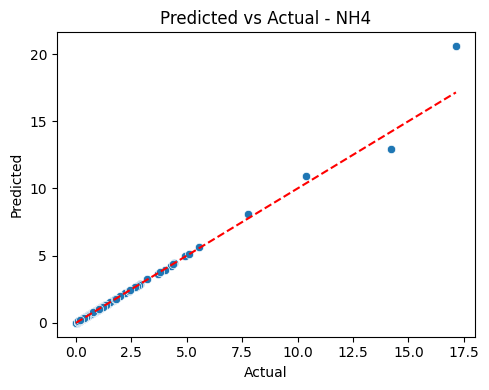

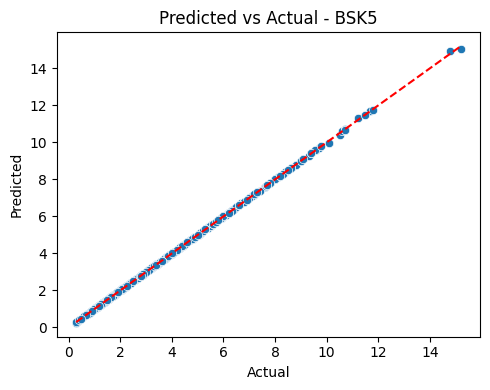

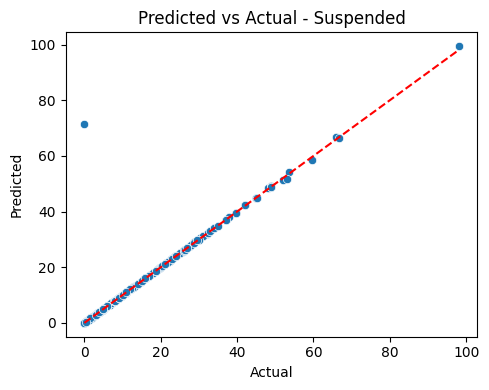

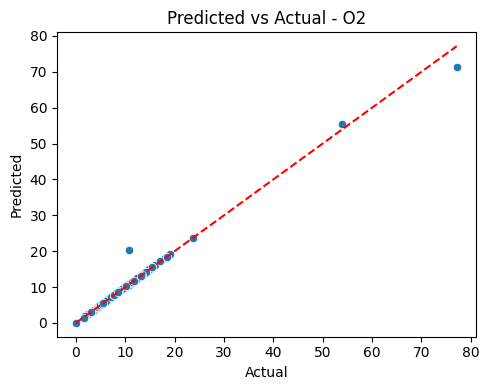

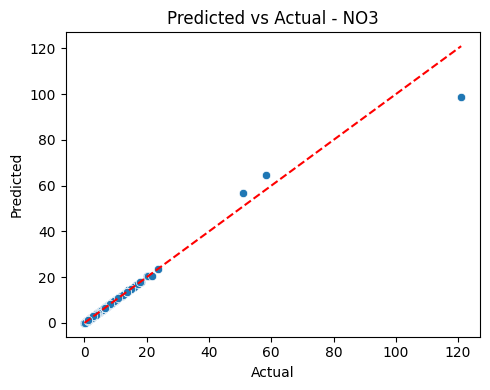

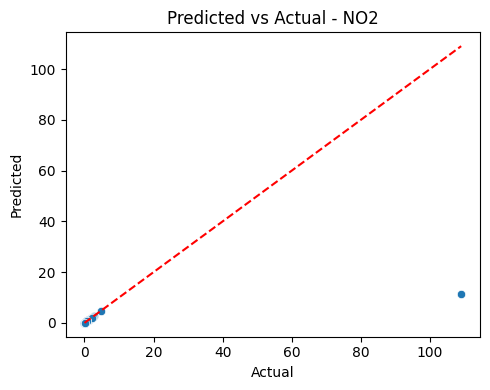

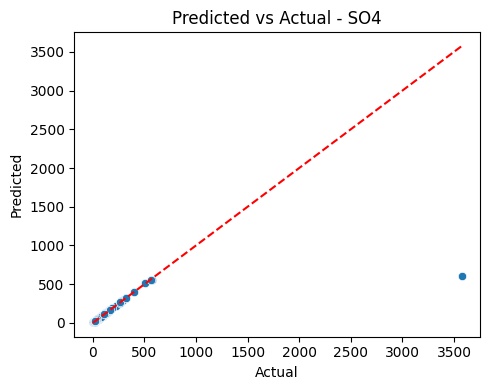

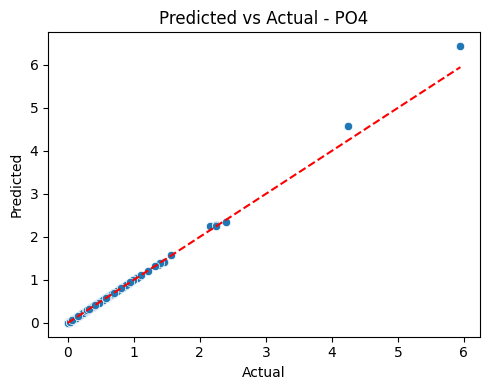

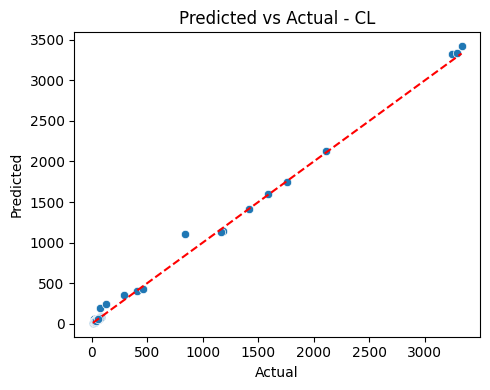

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

for i, col in enumerate(y_test.columns):
    plt.figure(figsize=(5, 4))
    sns.scatterplot(x=y_test[col], y=y_pred[:, i])
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.title(f"Predicted vs Actual - {col}")
    plt.plot([y_test[col].min(), y_test[col].max()],
             [y_test[col].min(), y_test[col].max()], 'r--')  # identity line
    plt.tight_layout()
    plt.show()


In [9]:
import joblib
joblib.dump(model, "/content/drive/My Drive/ML/water-quality-pred/multioutput_model.pkl")
joblib.dump(scaler, "/content/drive/My Drive/ML/water-quality-pred/scaler.pkl")


['/content/drive/My Drive/ML/water-quality-pred/scaler.pkl']

In [10]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Assuming you already have:
# y_test: DataFrame with true values
# y_pred: NumPy array from model.predict()

print("📊 Evaluation Metrics (R² and RMSE):\n")

for i, col in enumerate(y_test.columns):
    mse = mean_squared_error(y_test[col], y_pred[:, i])
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test[col], y_pred[:, i])

    print(f"--- {col} ---")
    print(f" R²   : {r2:.4f}")
    print(f" RMSE : {rmse:.4f}\n")


📊 Evaluation Metrics (R² and RMSE):

--- NH4 ---
 R²   : 0.9848
 RMSE : 0.1581

--- BSK5 ---
 R²   : 1.0000
 RMSE : 0.0151

--- Suspended ---
 R²   : 0.9162
 RMSE : 3.0321

--- O2 ---
 R²   : 0.9888
 RMSE : 0.4831

--- NO3 ---
 R²   : 0.9783
 RMSE : 1.0088

--- NO2 ---
 R²   : 0.1961
 RMSE : 4.1465

--- SO4 ---
 R²   : 0.3789
 RMSE : 125.8368

--- PO4 ---
 R²   : 0.9963
 RMSE : 0.0259

--- CL ---
 R²   : 0.9972
 RMSE : 15.2263

